In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd

In [19]:
#Exercicio 1
def point_fixo(f,x,tol):
    E = []
    X0 = [x]
    X1 = []
    erro = np.inf
    while(erro > tol):
        x_it = f(X0[-1])
        print(x_it)
        erro = np.abs((x_it - X0[-1])/x_it)
        X1.append(x_it)
        X0.append(x_it)
        
        E.append(erro)
    return X0, X1, E

def met_secante(f,x, tol=10e-10):
    E = []
    X0 = [0,x]
    X1 = []
    erro = np.inf
    while(erro > tol):
        x_it = X0[-1] - (f(X0[-1])*(X0[-2] - X0[-1]))/(f(X0[-2])-f(X0[-1]))
        erro = np.abs((x_it - X0[-1])/x_it)
        X1.append(x_it)
        X0.append(x_it)
        E.append(erro)
    return X0, X1, E

def newton_aphson(f, flinha, x, tol):
    E = []
    X0 = [x]
    X1 = []
    erro = np.inf
    while(erro > tol):
        x_it = X0[-1] - f(X0[-1])/flinha(X0[-1])
        erro = np.abs((x_it - X0[-1])/x_it)
        X1.append(x_it)
        X0.append(x_it)
        E.append(erro)
    return X0, X1, E

In [17]:
#Exercicio 2
def f(x):
    return np.cos(x)

x1, x0, e = point_fixo(f,0,10e-2)

pd.DataFrame({'xi':x0,'e':e},dtype=str)

,xi,e
0,1.0,1.0
1,0.5403023058681398,0.8508157176809255
2,0.8575532158463934,0.3699489479088844
3,0.6542897904977791,0.3106626884609844
4,0.7934803587425656,0.17541778660452648
5,0.7013687736227565,0.13133117495954122
6,0.7639596829006542,0.08192959743667133


In [48]:
#Exercicios 3
def f(x):
    return (x**10)-1
def flinha(x):
    return 10*(x**9)

In [43]:
%%time
x1, x0, e = newton_aphson(f,flinha,0.5,10e-12)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.31 ms


In [44]:
%%time
dx1, dx0, de = met_secante(f,0.5,10e-12)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 88.9 µs


In [46]:
%%time
opt.newton(func=f,x0=0.5)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 67.9 µs


0.5001499999999982

In [51]:
%%time
opt.newton(func=f,fprime=flinha,x0=0.5)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 233 µs


1.0

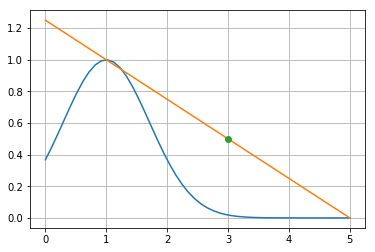

In [61]:
#Exercicio 4
def f4(x): 
    return np.exp(-(x-1)**2)


def f4linha(x): 
    return (-0.5*x+2.5)/2


x = np.linspace(0, 5)
plt.grid(True)
plt.plot(x, f4(x))
plt.plot(x, f4linha(x))
plt.plot
plt.plot(3, 1/2, marker='o')

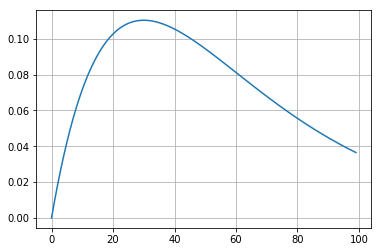

In [5]:
#Exercicio 5
def C(t):
    A = 0.1
    l = 1/3
    return A*t*np.exp(-l*t)
plt.grid(True)
plt.plot(C(np.arange(0,10,0.1)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


1.0

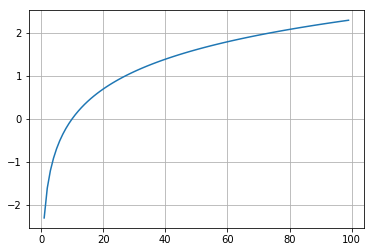

In [41]:
#Exercicio 6
def l(x):
    return np.log(x)
plt.grid(True)
plt.plot(l(np.arange(0,10,0.1)))
opt.newton(func=l,x0=1)

In [12]:
#Exercicio 7
#tendo m=c(1+i)**t => i=16**1/16 - 1
juro = 16**(1/16)-1
print(100*juro)

18.920711500272102


2.079441541678989

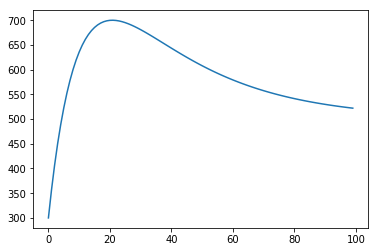

In [46]:
#exercicio 8
def t(t):
    return 500 -800*np.exp(-t) + 600*np.exp(-t/3)

def fLinha(x):
    return 4*np.exp(-x) - np.exp(-x/3)
plt.plot(t(np.arange(0,10,0.1)))
opt.bisect(fLinha, 0,3)

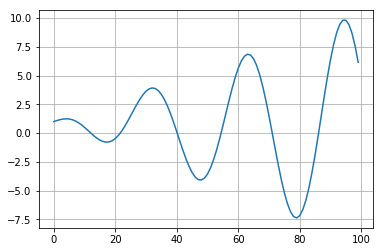

In [20]:
#exercicio 10
def funcao(x):
    return np.exp(-x/11) + x*np.cos(2*x)
plt.grid(True)
plt.plot(funcao(np.arange(0,10,0.1)))


In [45]:
_, x1, e = met_secante(funcao,0.5,10e-7)
pd.DataFrame({'xi':x1,'e':e},dtype=str)

,xi,e
0,-2.215190820598998,1.225714189202354
1,5.921781703561331,1.3740750556993333
2,-6.914491919498774,1.856430490122056
3,-6.3704465110993915,0.08540145615405109
4,-6.9428484771299805,0.08244483052109
5,-6.924074742010254,0.0027113709512436327
6,-6.931373860321802,0.0010530550593052213
7,-6.931409733028958,5.1753840181953485e-06
8,-6.931409618788177,1.6481608729290407e-08
